#**Task 01**

**Predict the percentage of an student based on the no.of study hour using supervised ML.**


**Dataset :http://bit.ly/w-data**

# **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load dataset
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **For checking missing values**

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

**Plotting the Study Hours vs Scores Percentage**

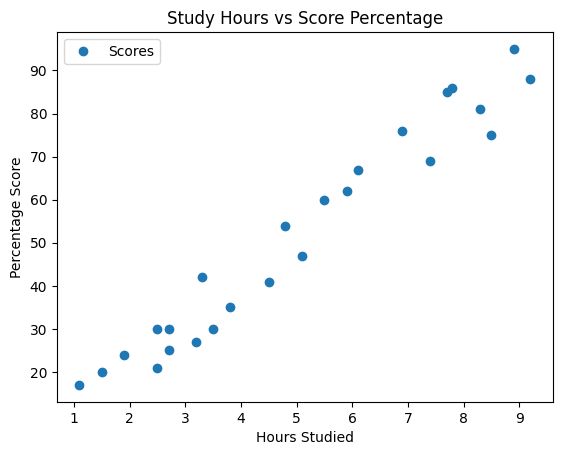

In [7]:
# scatter plot
df.plot(x='Hours', y='Scores', style='o')
plt.title('Study Hours vs Score Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

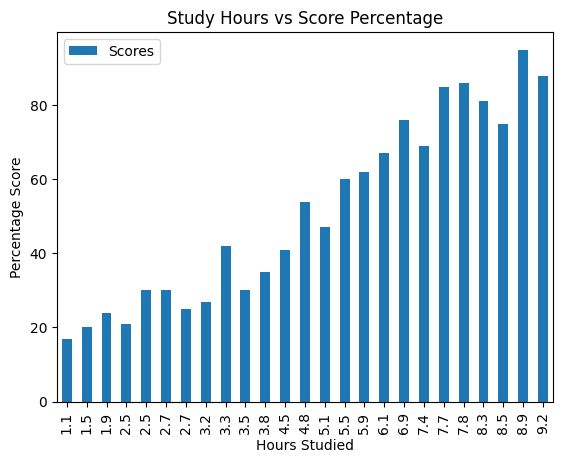

In [8]:
# bar plot
data_sorted = df.sort_values(by='Hours')

# Create a bar plot
data_sorted.plot.bar(x='Hours', y='Scores')
plt.title('Study Hours vs Score Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Prepering Data**

Independent variable (attribute/input): Hours studied || Dependent variable (label/output): Score percentage

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

 **Spit Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Model**

In [11]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Testing Data**

In [12]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test, y_pred, squared=False))

4.647447612100373


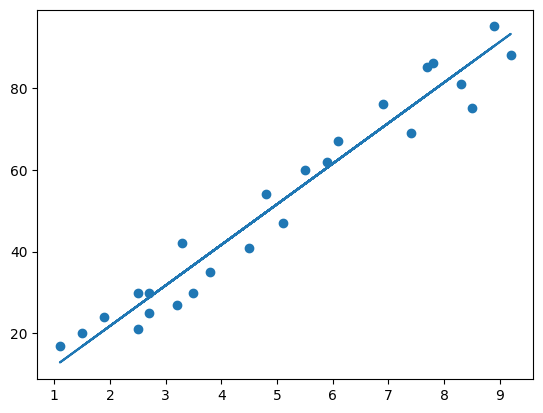

In [14]:
# Plot the regression line
line = model.coef_*X + model.intercept_

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# **Prediction**

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Score': y_test,  'Predicted': y_pred })
df

,Actual Score,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Scores')

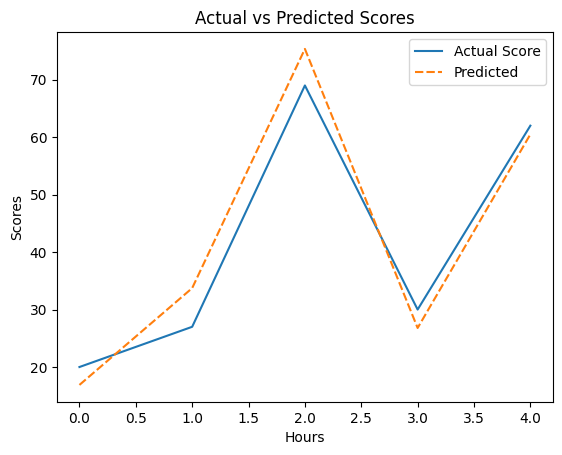

In [16]:
sns.lineplot(data = df)
plt.title("Actual vs Predicted Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

In [17]:
# predicitng the score based on hours

score = model.predict([[9.25]]) # put the hours value in the array
print("Predicted Score = {}".format(score))

Predicted Score = [93.69173249]


That means if a student studies 9.25 hours per day will get 93% marks.

Evalute the model

In [18]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982


Here's, Mean Absolute Error of 4.18 indicates that, on average, the model's predictions deviate by approximately 4.18 units from the actual values.